This question I want to get from this dataset are:
- Total types of the real estate that exist in the dataset
- Total types of the real estate in specific location

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import json_normalize
import pandas as pd
from pandas import json_normalize
import json
import re
import itertools

In [3]:
def load_data(title):
    with open(title,encoding='utf-8') as f:
        return json.load(f)

In [6]:
realestate_kh = "./realestate_kh_cleaner2023-05-20.json"
realestate_kh_list = load_data(realestate_kh)

In [7]:
df2 = json_normalize(realestate_kh_list) 
df2

,location,price,bedrooms,bathrooms,floors,lands,type
0,Phnom Penh,"$52,000",1,1,35,None,Apartment
1,Phnom Penh,"$290,000",4,5,None,None,Twin
2,Sihanoukville,"$45,000",1,1,35,None,Apartment
3,Sihanoukville,"$7,500,000",None,None,None,1025,Land
4,Sihanoukville,"$1,500/m²",None,None,None,1593,Land
...,...,...,...,...,...,...,...
995,Phnom Penh,"$120,000",5,6,None,102,Flat
996,Kandal,"$47,000",2,3,None,77,Flat
997,Phnom Penh,"$255,000",4,5,None,160,Twin
998,Siem Reap,"$1,054,000",1,1,None,1054,House


## Exploring the data

### Get category type data

In [14]:
realestate_type = []

# loop to get cate into one array 
# for cate in realestate_kh_list:
#     print(cate['type'])
# since have duplicates we want to remo|ve it.
# sources : https://stackoverflow.com/questions/9835762/how-do-i-find-the-duplicates-in-a-list-and-create-another-list-with-them
seen = set()
for realestate in realestate_kh_list:
    if realestate['type'] not in seen and realestate['type'] != None and realestate['type'] != re.search("POA", (realestate['type'])):
        realestate_type.append(realestate['type'])
        seen.add(realestate['type'])

realestate_type.remove('CondoPOA')
realestate_type.remove('LandPOA')
# realestate_type.remove('Serviced Apartment')
# realestate_type.remove('Residential Property')
realestate_type
         

['Apartment',
 'Twin',
 'Land',
 'Project',
 'Condo',
 'Borey',
 'Villa',
 'Flat',
 'Shophouse',
 'House',
 'Link',
 'Studio']

In [15]:
categoryArr = []
for item in realestate_kh_list:
    categoryArr.append(item['type'])


realestate_type_counts = {i:categoryArr.count(i) for i in categoryArr}

realestate_type_counts.pop(None)
realestate_type_counts.pop('CondoPOA')
realestate_type_counts.pop('LandPOA')
# realestate_type_counts.pop('Serviced Apartment')
# realestate_type_counts.pop('Residential Property')

realestate_type_counts

{'Apartment': 40,
 'Twin': 41,
 'Land': 159,
 'Project': 6,
 'Condo': 166,
 'Borey': 2,
 'Villa': 108,
 'Flat': 40,
 'Shophouse': 73,
 'House': 343,
 'Link': 16,
 'Studio': 1}

## Total realestate_type compare from one to another

<BarContainer object of 12 artists>

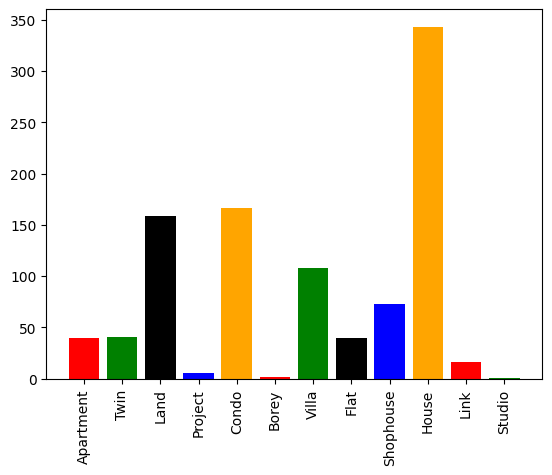

In [16]:
heights = list(realestate_type_counts.values())
bars = realestate_type
y_pos = range(len(bars))
c = ['red', 'green', 'black', 'blue', 'orange']

# Rotation of the bars names
plt.xticks(y_pos, bars,rotation=90)
plt.bar(y_pos, heights,color=c)


## Total realestate_type compare from one to another base in city or province

In [18]:
# function for finding realestate at all locatios
import collections
def count_realestate_and_location(location_name):
    realestate_location_type = {}
    list_realestate = []
    for item in realestate_kh_list:
        if item['location'] == location_name:
            list_realestate.append(item['type'])
    realestate_location_type = {i:list_realestate.count(i) for i in list_realestate}
    if None in realestate_location_type:
        realestate_location_type.pop(None)
    if 'CondoPOA' in realestate_location_type:
        realestate_location_type.pop('CondoPOA')
    if 'Residential Property' in realestate_location_type:
        realestate_location_type.pop('Residential Property')
    if 'LandPOA' in realestate_location_type:
        realestate_location_type.pop('LandPOA')
    if 'Serviced Apartment' in realestate_location_type:
        realestate_location_type.pop('Serviced Apartment')
    for realestate_type_check in realestate_type:

        if realestate_type_check in realestate_location_type.keys():
            pass
        else:
            realestate_location_type[realestate_type_check] =  0
    if realestate_location_type:
        result = dict(sorted(realestate_location_type.items()))
        print(result)
        return list(result.values())


        
count_realestate_and_location('Phnom Penh')
# realestate_type

{'Apartment': 22, 'Borey': 2, 'Condo': 158, 'Flat': 33, 'House': 194, 'Land': 53, 'Link': 12, 'Project': 5, 'Shophouse': 62, 'Studio': 1, 'Twin': 39, 'Villa': 76}


[22, 2, 158, 33, 194, 53, 12, 5, 62, 1, 39, 76]

In [19]:
count_realestate_and_location('Kampong Cham')


{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'House': 0, 'Land': 0, 'Link': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin': 0, 'Villa': 0}


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
# get location to list

locationArr = ['Banteay Meanchey','Battambang','Kampong Cham','Kampong Chhnang','Kampong Speu','Kampong Thom','Kampot','Kandal','Koh Kong','Kratié','Mondulkiri','Phnom Penh','Preah Vihear','Prey Veng','Pursat','Ratanakiri','Siem Reap','Preah Sihanouk','Stung Treng','Svay Rieng','Takéo','Oddar Meanchey','Kep','Pailin','Tboung Khmum']
location_count_with_realestate_type = []
for location in locationArr:
    print("".join(str(count_realestate_and_location(location))))
    data = {"".join(str(count_realestate_and_location(location))), location}
    location_count_with_realestate_type.append(data)
location_count_with_realestate_type

{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'House': 1, 'Land': 2, 'Link': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin': 0, 'Villa': 1}
[0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1]
{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'House': 1, 'Land': 2, 'Link': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin': 0, 'Villa': 1}
{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'House': 6, 'Land': 0, 'Link': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin': 0, 'Villa': 0}
[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0]
{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'House': 6, 'Land': 0, 'Link': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin': 0, 'Villa': 0}
{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'House': 0, 'Land': 0, 'Link': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 'Twin': 0, 'Villa': 0}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
{'Apartment': 0, 'Borey': 0, 'Condo': 0, 'Flat': 0, 'House': 0, 'Land': 0, 'Link': 0, 'Project': 0, 'Shophouse': 0, 'Studio': 0, 

[{'Banteay Meanchey', '[0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1]'},
 {'Battambang', '[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0]'},
 {'Kampong Cham', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Kampong Chhnang', '[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]'},
 {'Kampong Speu', '[0, 0, 0, 0, 4, 10, 0, 0, 0, 0, 0, 2]'},
 {'Kampong Thom', '[0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]'},
 {'Kampot', '[0, 0, 0, 0, 4, 15, 0, 0, 0, 0, 0, 2]'},
 {'Kandal', '[5, 0, 0, 6, 29, 23, 4, 0, 3, 0, 0, 5]'},
 {'Koh Kong', '[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]'},
 {'Kratié', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Mondulkiri', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Phnom Penh', '[22, 2, 158, 33, 194, 53, 12, 5, 62, 1, 39, 76]'},
 {'Preah Vihear', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Prey Veng', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Pursat', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Ratanakiri', '[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'},
 {'Siem Reap', '[3, 0, 3, 0, 77, 37, 0, 0, 4, 0, 2, 14]'},
 {'Preah Sihan

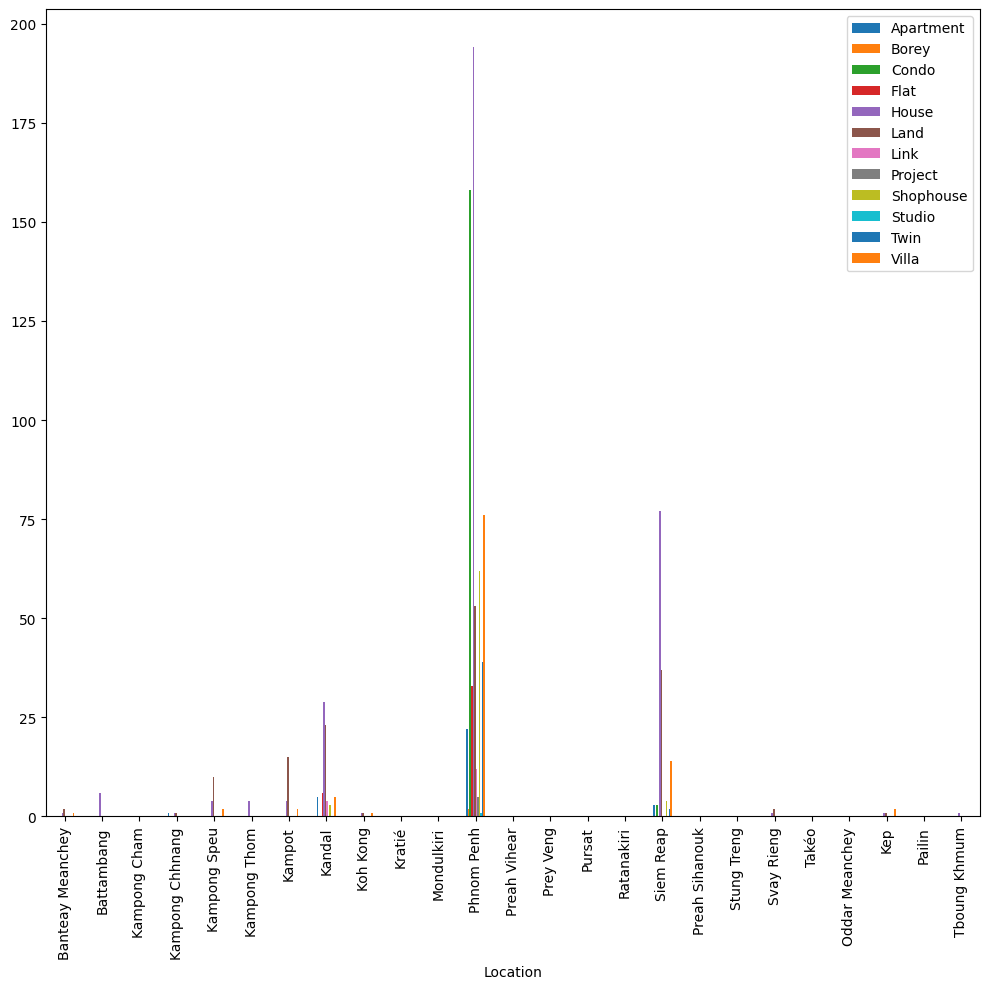

In [130]:

data=[["Banteay Meanchey", 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1],
      ['Battambang', 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0],
      ['Kampong Cham', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Kampong Chhnang', 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
      ['Kampong Speu', 0, 0, 0, 0, 4, 10, 0, 0, 0, 0, 0, 2],
      ['Kampong Thom', 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
      ['Kampot', 0, 0, 0, 0, 4, 15, 0, 0, 0, 0, 0, 2],
      ['Kandal', 5, 0, 0, 6, 29, 23, 4, 0, 3, 0, 0, 5],
      ['Koh Kong', 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
      ['Kratié', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Mondulkiri', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Phnom Penh', 22, 2, 158, 33, 194, 53, 12, 5, 62, 1, 39, 76],
      ['Preah Vihear', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Prey Veng', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Pursat', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Ratanakiri', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Siem Reap', 3, 0, 3, 0, 77, 37, 0, 0, 4, 0, 2, 14],
      ['Preah Sihanouk', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Stung Treng', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Svay Rieng', 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
      ['Takéo', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Oddar Meanchey', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Kep', 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2],
      ['Pailin', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      ['Tboung Khmum', 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
     ]
# Plot multiple columns bar chart


df=pd.DataFrame(data,columns=["Location",'Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'])

df.plot(x="Location", y=['Apartment','Borey','Condo','Flat','House','Land','Link','Project','Shophouse','Studio','Twin', 'Villa'], kind="bar",stacked=False,figsize=(10,10))

# Show

plt.show()


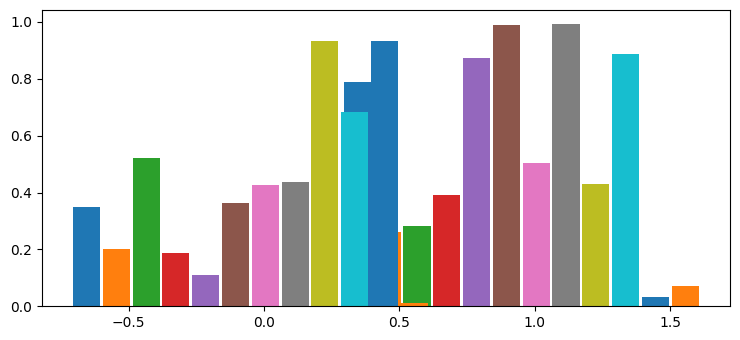